In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import copy
import scipy.linalg as la

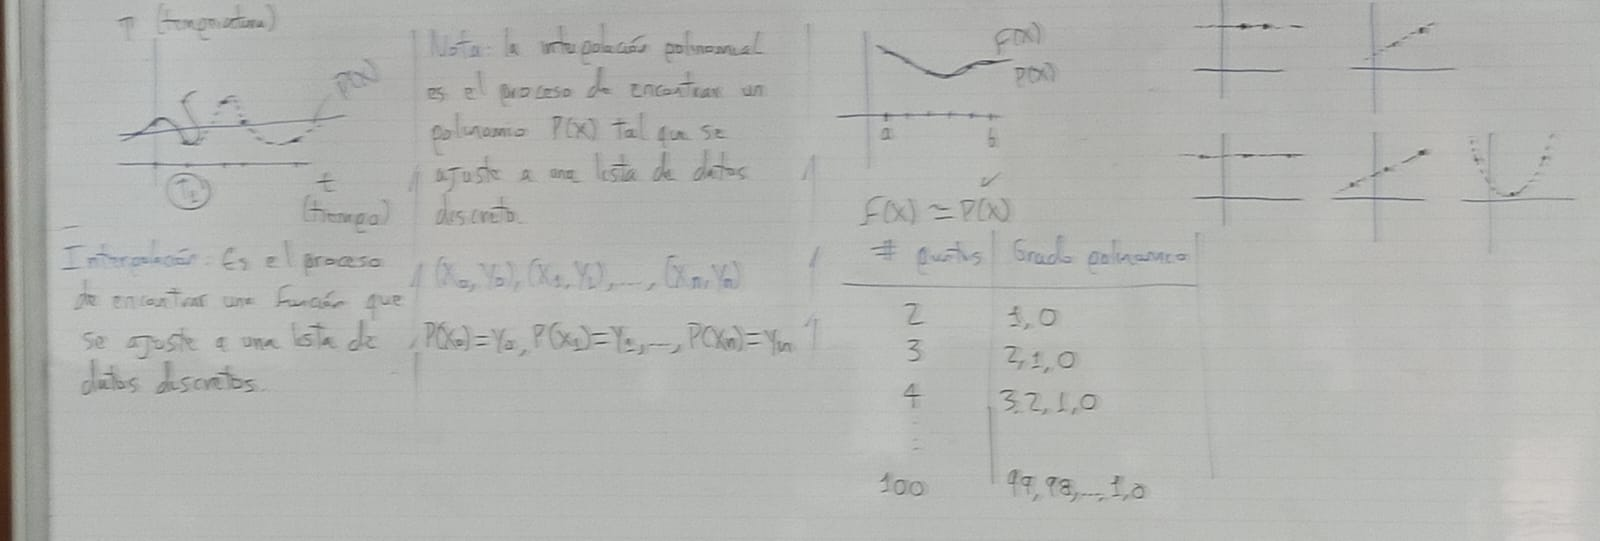

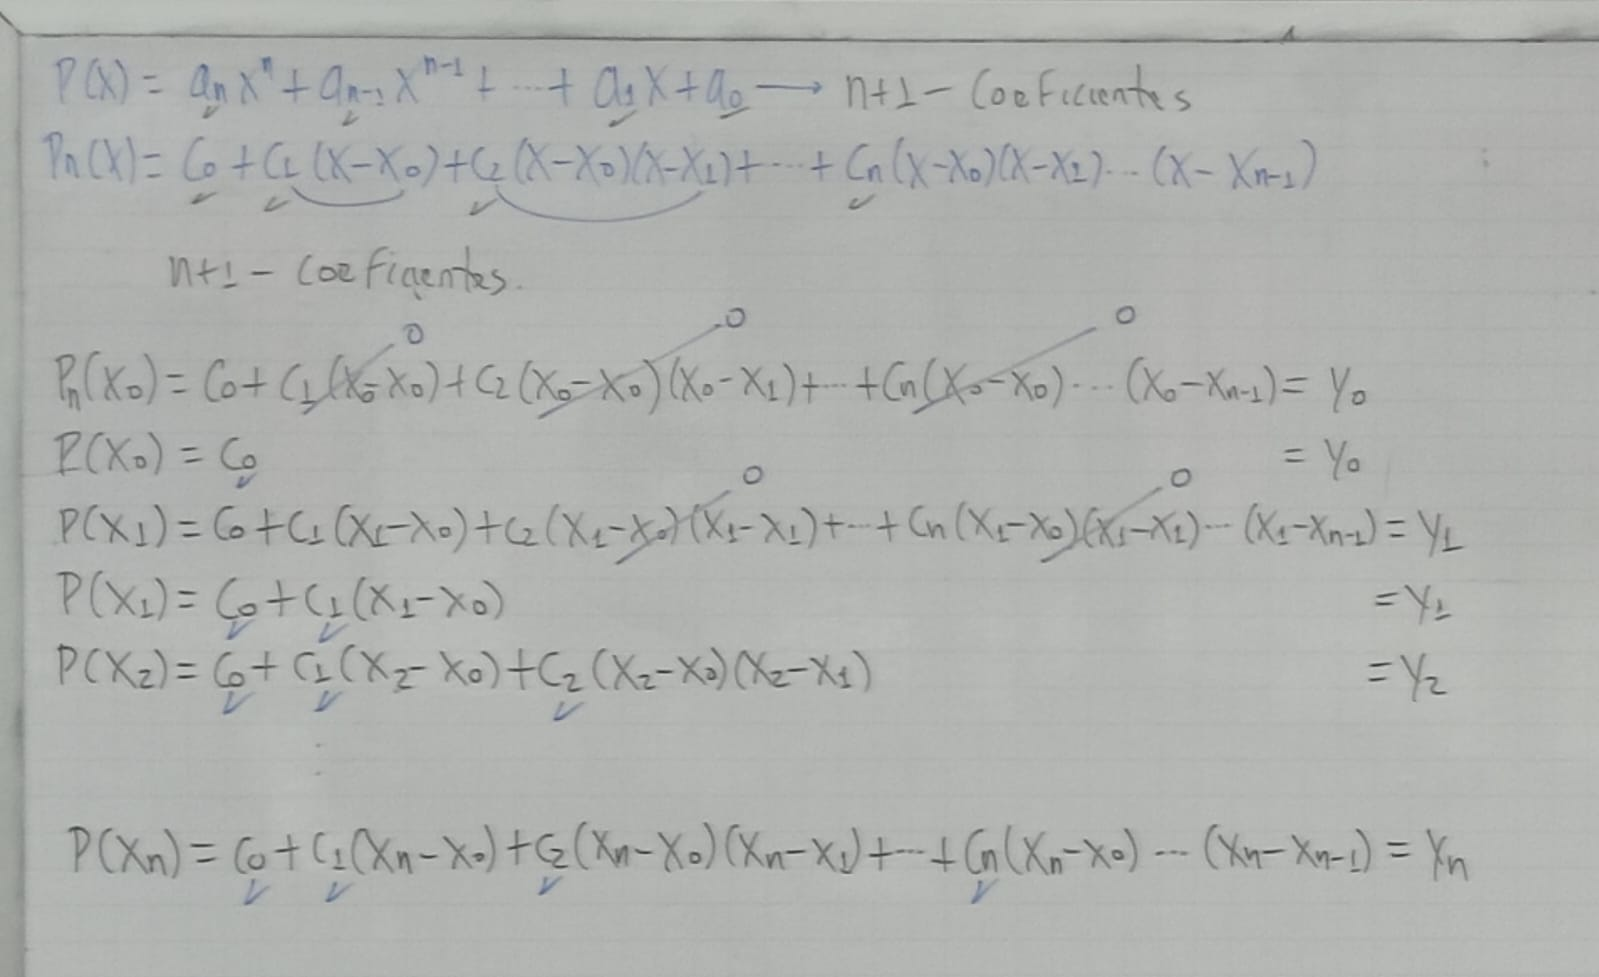

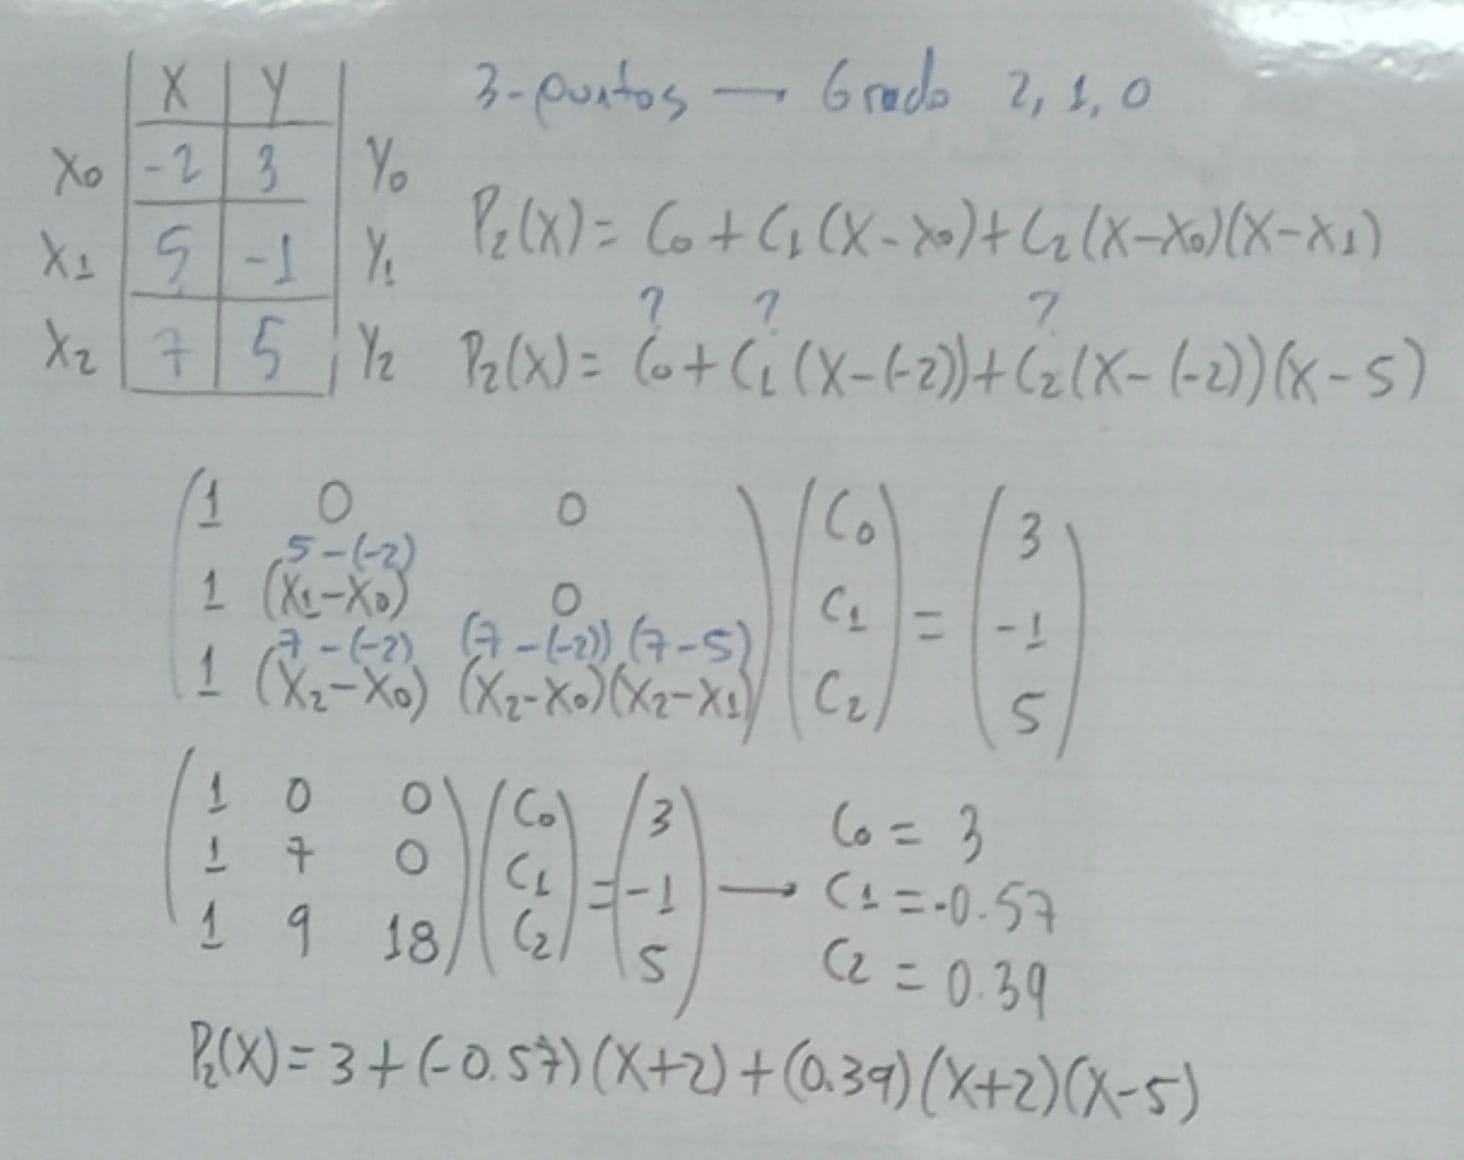

[[ 3.        ]
 [-0.57142857]
 [ 0.3968254 ]]
[[ 3.        ]
 [-0.57142857]
 [ 0.3968254 ]]


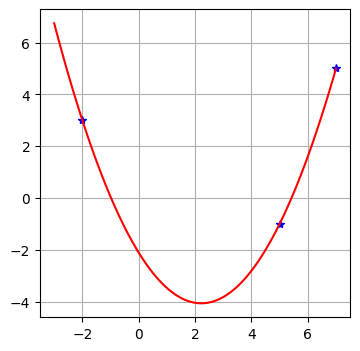

In [ ]:
# Valores de 'x' y 'y'
x = [-2, 5, 7]
y = [3, -1, 5]

# Matriz
A = np.array([[1, 0, 0], [1, 7, 0], [1, 9, 18]])
B = np.array([[3], [-1], [5]])
c = np.linalg.solve(A, B)
print(c)

# Funcion calculable
def p_2(x):  # Polinomio de grado 2
  return c[0] + c[1]*(x + 2) + c[2]*(x + 2)*(x - 5)

print(c)

# Grafica
x1 = np.linspace(-3, 7, 100)
plt.figure(figsize = [4, 4])
plt.plot(x, y, 'b*')
plt.plot(x1, p_2(x1), 'r')
plt.grid()

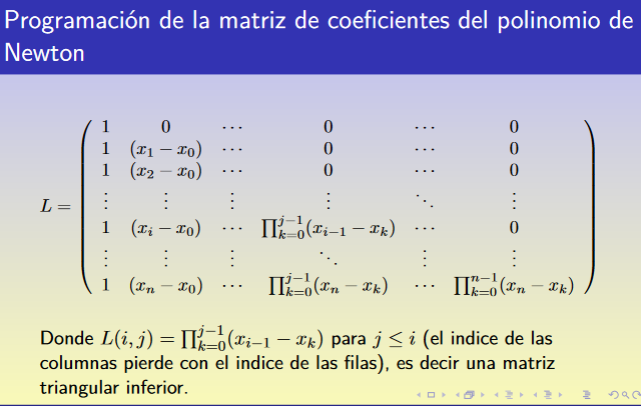

In [ ]:
# X es un vector fila (numpy)
# y es un vector fila (numpy)
def mat_new(x,y):
  n = len(x)
  L = np.zeros((n,n))
  L[:,0] = np.ones((1,n))
  for j in range(1,n):
    for i in range(j, n):
      pro = 1
      for k in range(0, j):
        pro = pro * (x[i]-x[k])
      L[i,j] = pro
  c = np.linalg.solve(L, y)
  return L,c
x = np.array([-2,5,7], float)
y = np.array([3, -1, 5], float)
print(mat_new(x,y))

(array([[ 1.,  0.,  0.],
       [ 1.,  7.,  0.],
       [ 1.,  9., 18.]]), array([ 3.        , -0.57142857,  0.3968254 ]))


Ejemplo

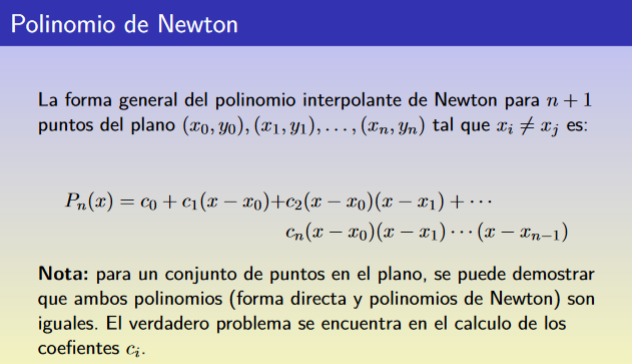

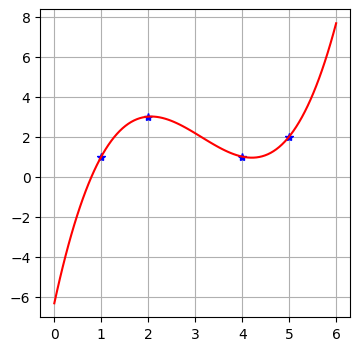

In [ ]:
x = np.array([1,2,4,5], float)
y = np.array([1, 3, 1, 2], float)
[L,c] = mat_new(x,y)

def p(x2):
  return c[0] + c[1]*(x2 - x[0]) + c[2]*(x2 - x[0])*(x2 - x[1]) + c[3]*(x2 - x[0])*(x2 - x[1])*(x2 - x[2]) # <- hacerlo de manera automatica def poli_new(x,c,x_var)

x1 = np.linspace(0, 6, 100)
plt.figure(figsize = [4, 4])
plt.plot(x, y, 'b*')
plt.plot(x1, p(x1), 'r')
plt.grid()

# Manera automatica

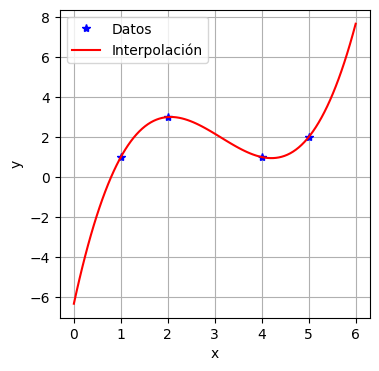

In [ ]:
def mat_new(x, y):
    n = len(x)
    L = np.zeros((n, n))
    L[:, 0] = np.ones((1, n))
    for j in range(1, n):
        for i in range(j, n):
            pro = 1
            for k in range(0, j):
                pro = pro * (x[i] - x[k])
            L[i, j] = pro
    c = np.linalg.solve(L, y)
    return L, c

def poli_new(x, c, x_var):
    n = len(c)
    result = c[0]
    for i in range(1, n):
        term = c[i]
        for j in range(i):
            term *= (x_var - x[j])
        result += term
    return result

x = np.array([1,2,4,5], float)
y = np.array([1,3,1,2], float)
[L, c] = mat_new(x, y)

x_interp = np.linspace(0, 6, 100)
y_interp = poli_new(x, c, x_interp)

plt.figure(figsize=[4, 4])
plt.plot(x, y, 'b*', label='Datos')
plt.plot(x_interp, y_interp, 'r', label='Interpolación')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

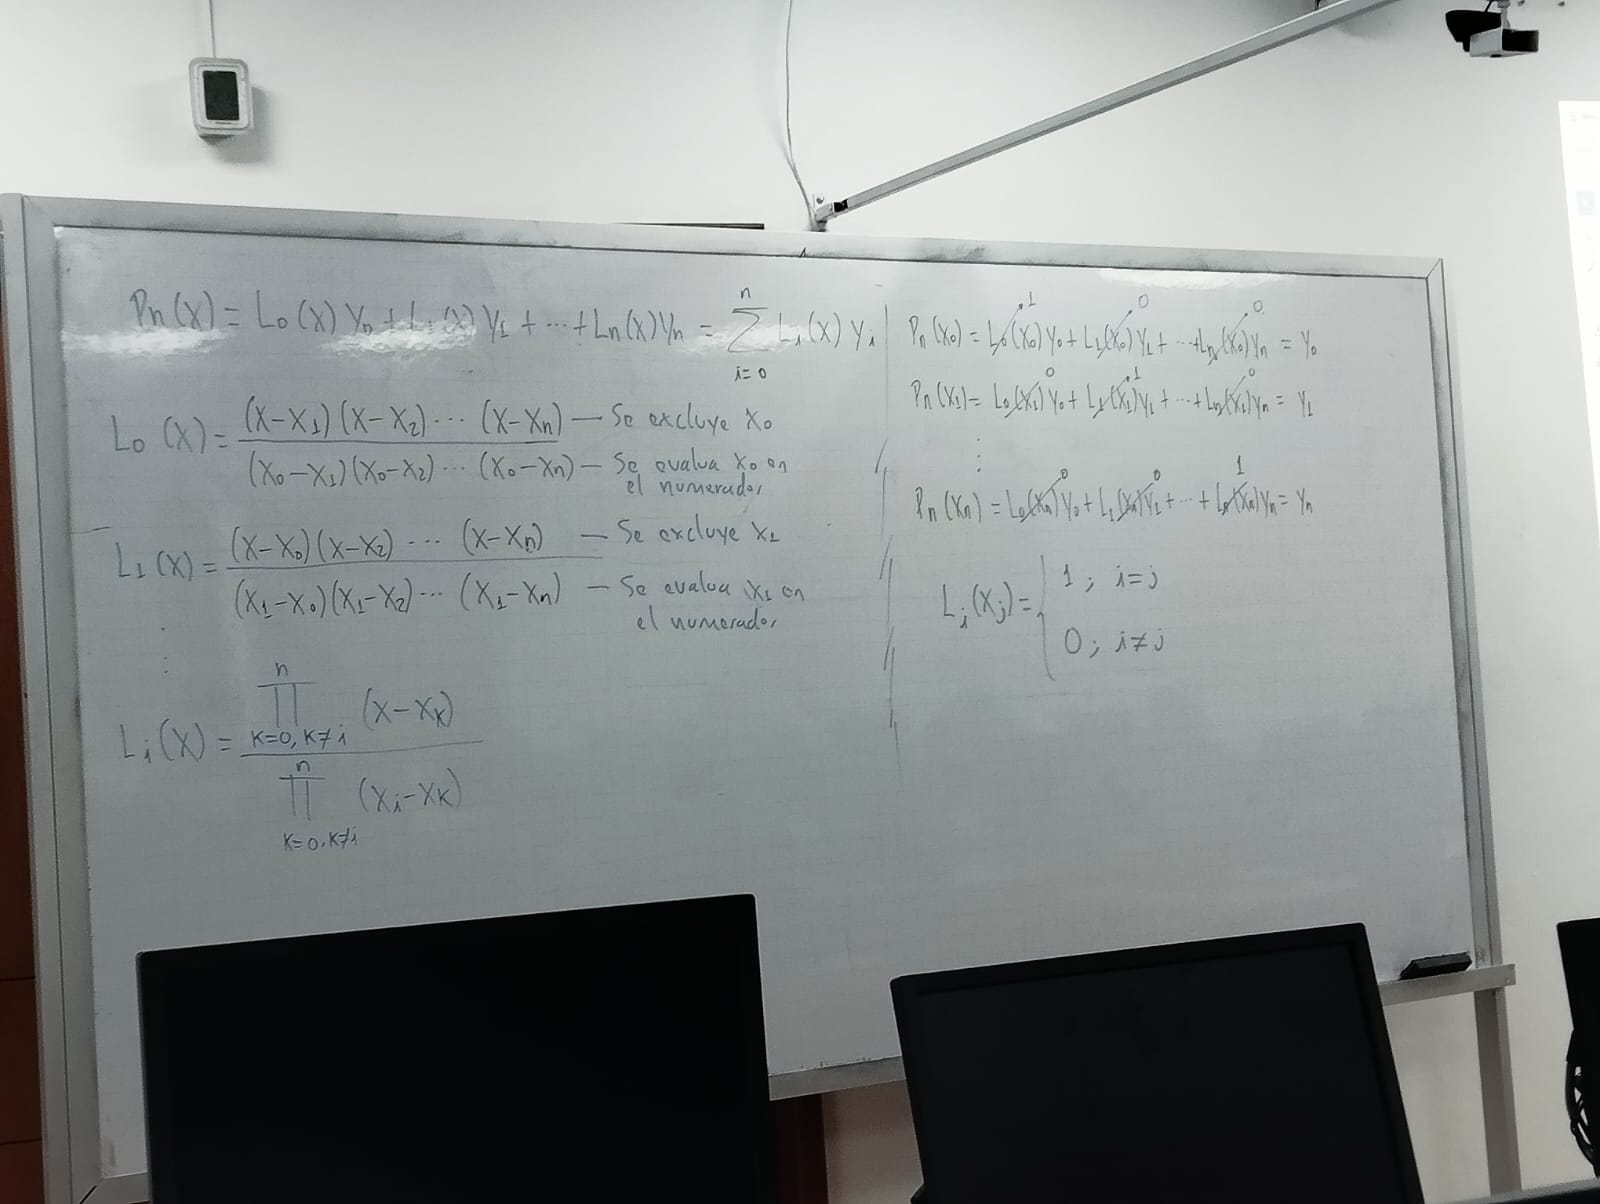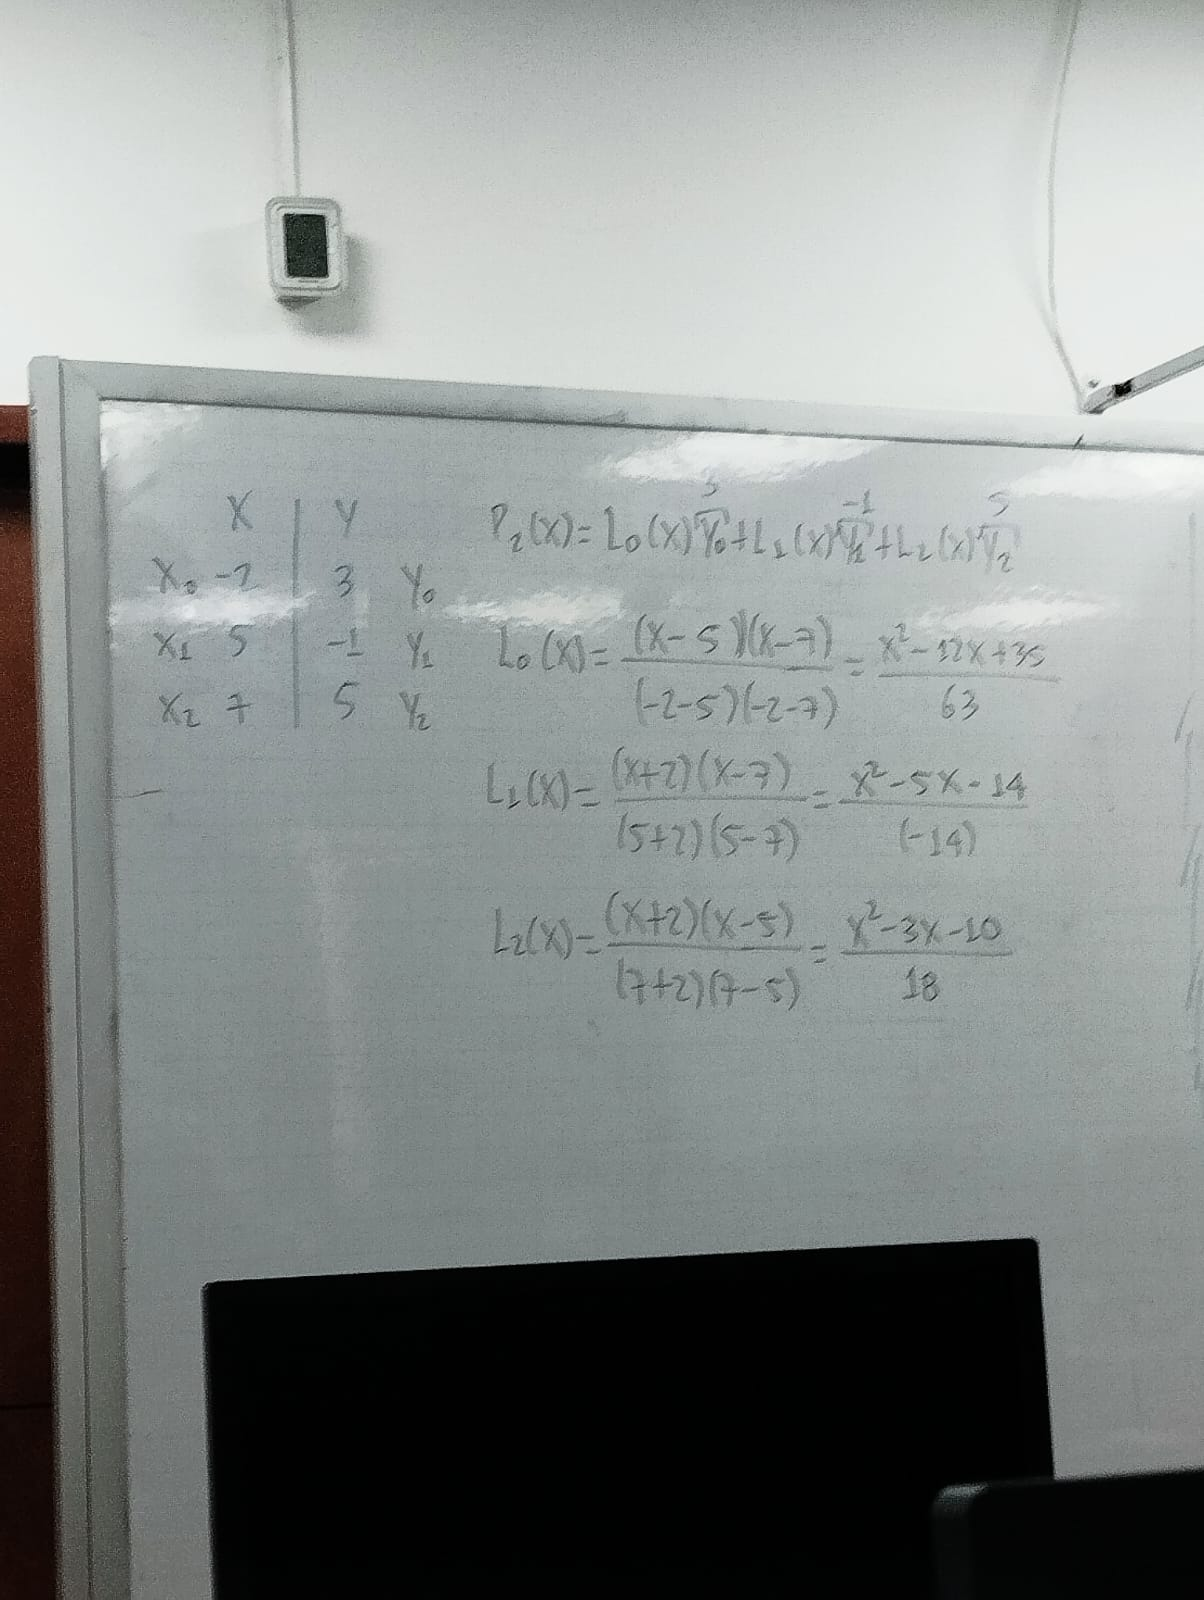

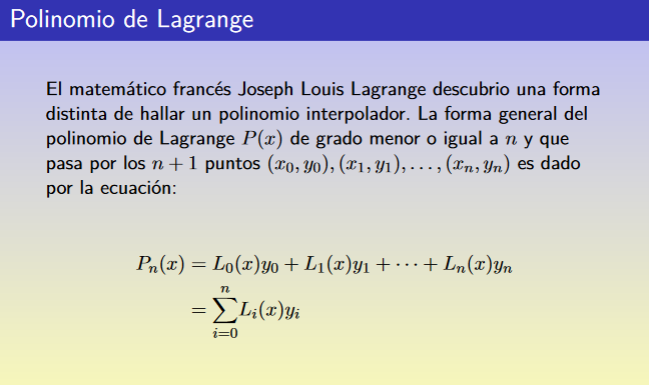

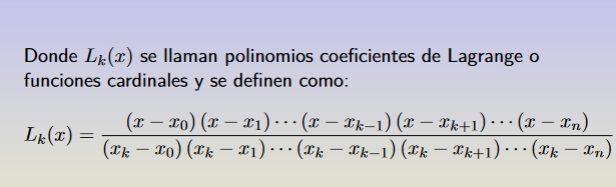

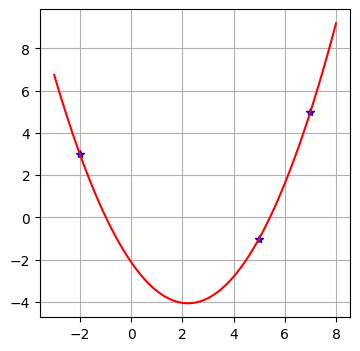

In [ ]:
x = np.array([-2, 5, 7], float)
y = np.array([3, -1, 5], float)
def L_0(x):
  return (x**2-12*x+35)/63
def L_1(x):
  return (x**2-5*x-14)/(-14)
def L_2(x):
  return (x**2-3*x-10)/18
def P_largrange(x):
  return L_0(x)*y[0]+L_1(x)*y[1]+L_2(x)*y[2]


x1 = np.linspace(-3, 8, 100)
plt.figure(figsize = [4, 4])
plt.plot(x, y, 'b*')
plt.plot(x1, P_largrange(x1), 'r')
plt.grid()

# Manera automatica

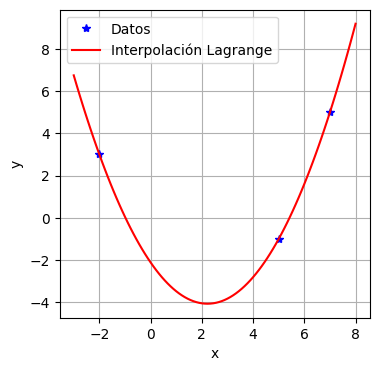

In [ ]:
def lagrange_polynomial(x, y, x_var):
    n = len(x)
    result = 0
    for j in range(n):
        L = 1
        for i in range(n):
            if i != j:
                L *= (x_var - x[i]) / (x[j] - x[i])
        result += y[j] * L
    return result

x = np.array([-2, 5, 7], float)
y = np.array([3, -1, 5], float)

x_interp = np.linspace(-3, 8, 100)
y_interp = lagrange_polynomial(x, y, x_interp)

plt.figure(figsize=[4, 4])
plt.plot(x, y, 'b*', label='Datos')
plt.plot(x_interp, y_interp, 'r', label='Interpolación Lagrange')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

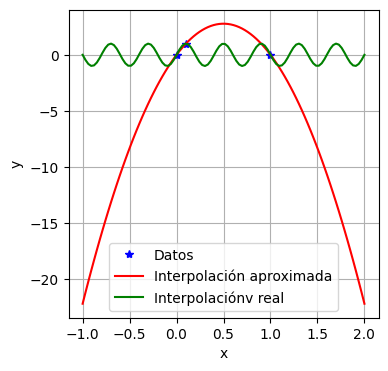

In [ ]:
x = np.array([0,0.1,1], float)
y = np.array([0,1,0], float)

def real(x): #funcion real de los datos
    return np.sin(5*np.pi*x)

[L, c] = mat_new(x, y)

x_interp = np.linspace(-1, 2, 100)
y_interp = poli_new(x, c, x_interp)

plt.figure(figsize=[4, 4])
plt.plot(x, y, 'b*', label='Datos')
plt.plot(x_interp, y_interp, 'r', label='Interpolación aproximada')
plt.plot(x_interp, real(x_interp), 'g', label='Interpolaciónv real')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

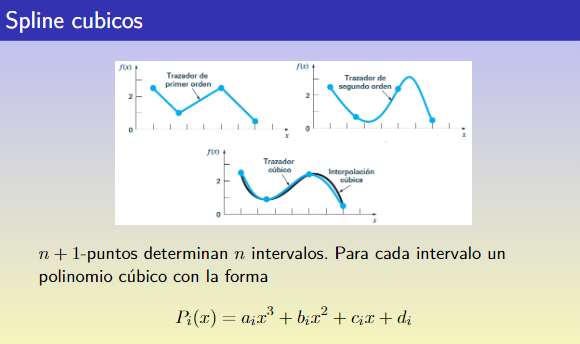

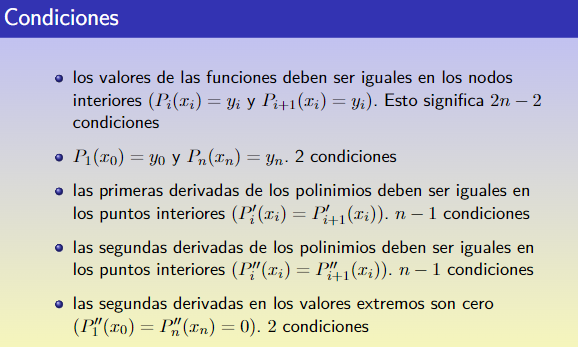

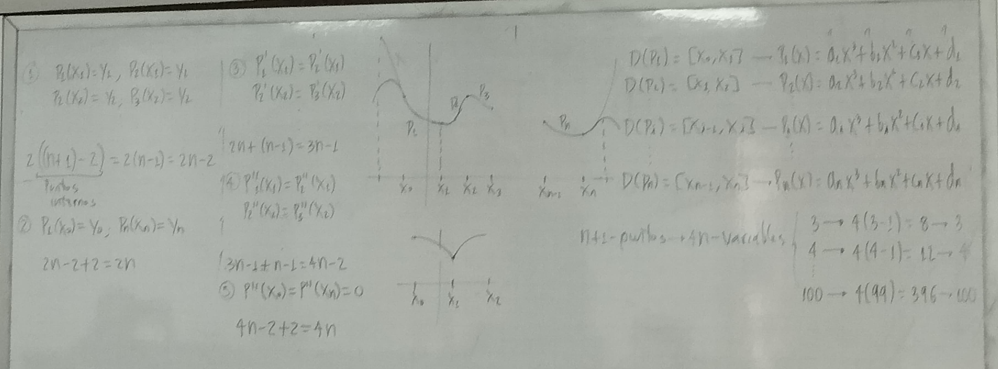

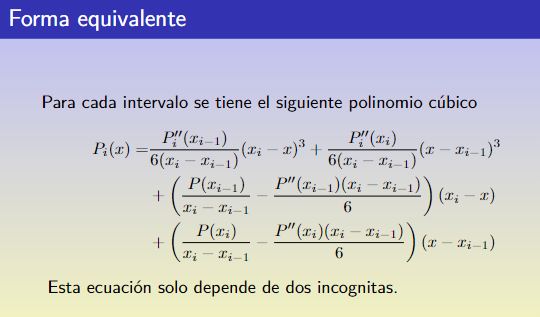

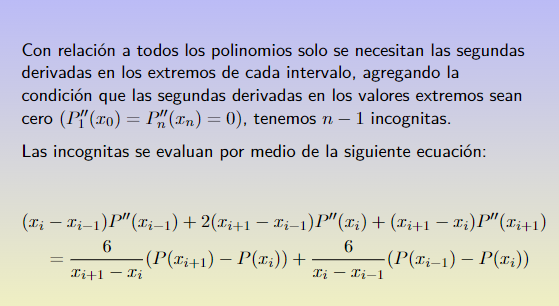

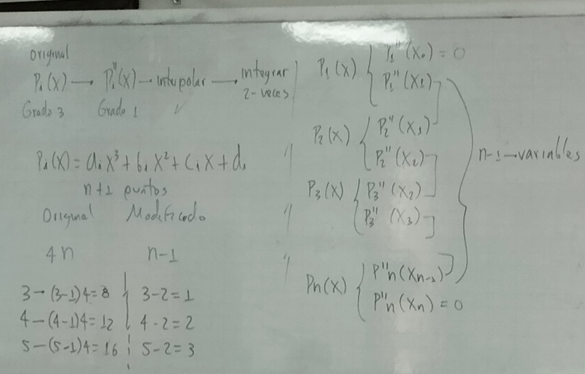

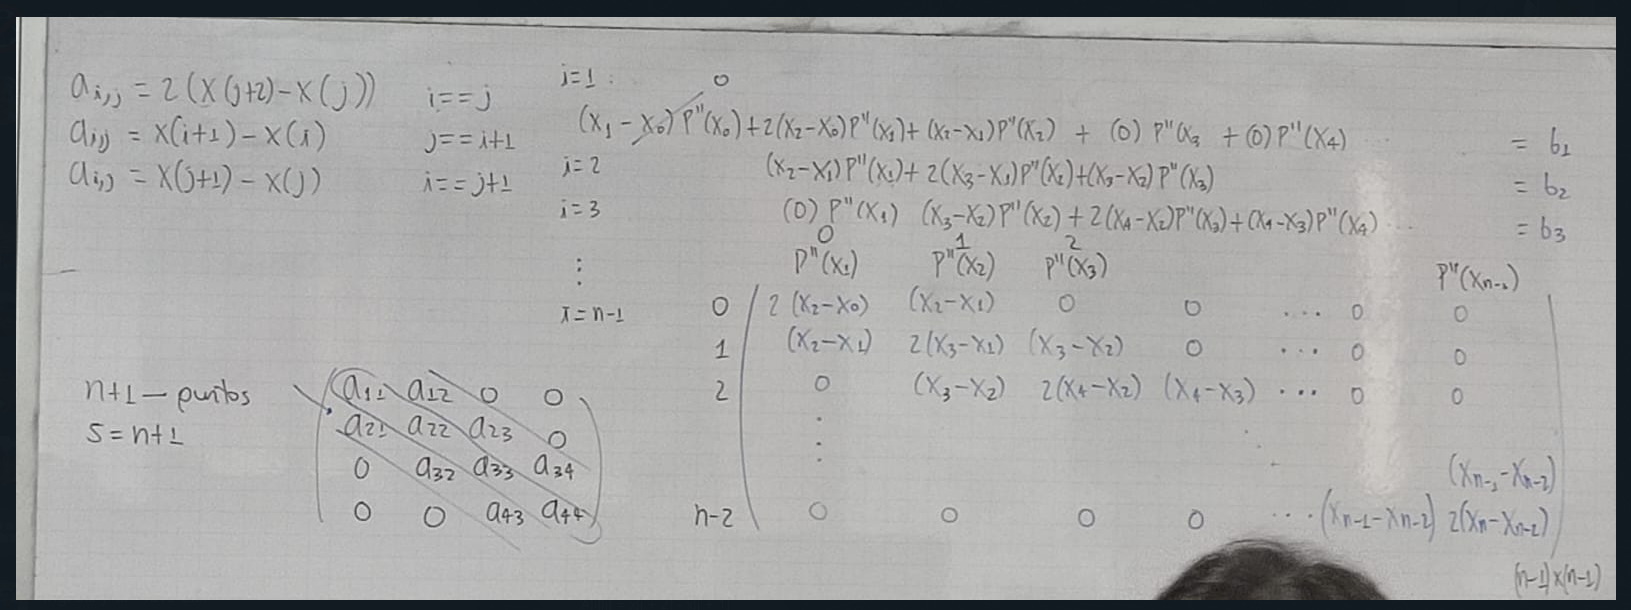

In [ ]:
def matSpliCubico(x, y):
  n = len(x) - 2
  A = np.zeros((n, n))
  for i in range(n):
    for j in range(n):
      if i == j: # Diagonal principal
        A[i][j] = 2 * (x[j + 2] - x[j])
      elif j + 1 == i: # Diagonal Inferior
        A[i][j] = x[j + 2] - x[j + 1]
      elif j - 1 == i: # Diagonal Superior
        A[i][j] = x[j + 1] - x[j]
  return A

def mat_spline(x, y):
  n = len(x)-2
  L = np.zeros([n,n])
  b = np.zeros([n,1])
  for i in range(1, n+1):
    L[i-1,i-1] = 2*(x[i+1]-x[i-1])
    if i < n:
      L[i,i-1] = (x[i+1]-x[i])
      L[i-1,i] = (x[i+1]-x[i])
    su1 = 6/(x[i+1]-x[i])*(y[i+1]-y[i])
    su2 = 6/(x[i]-x[i-1])*(y[i-1]-y[i])
    b[i-1,0] = su1 + su2

  return np.linalg.solve(L,b)

def mat_spline2(x, y):
  n = len(x)-2
  L = np.zeros([n,n])
  b = np.zeros([n,1])
  for i in range(1, n+1):
    L[i-1,i-1] = 2*(x[i+1]-x[i-1])
    if i < n:
      L[i,i-1] = (x[i+1]-x[i])
      L[i-1,i] = (x[i+1]-x[i])
    su1 = 6/(x[i+1]-x[i])*(y[i+1]-y[i])
    su2 = 6/(x[i]-x[i-1])*(y[i-1]-y[i])
    b[i-1,0] = su1 + su2
  c = np.zeros((n+2,1))
  c[1:n+1:1,:] = np.linalg.solve(L,b)
  return c

x = np.array([3, 4.5, 7, 9], float)
y = np.array([2.5, 1, 2.5, 0.5], float)

#print(matrix_spline(x))
c = mat_spline2(x, y)
print(c)

[[ 0.        ]
 [ 1.67908745]
 [-1.53307985]
 [ 0.        ]]


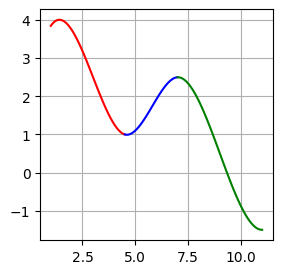

In [ ]:
def poli_spline(x, y, i, c, x1):
  const = x[i]-x[i-1]
  su1 = c[i-1,0]/(6*const)*(x[i]-x1)**3
  su2 = c[i,0]/(6*const)*(x1 - x[i-1])**3
  su3 = (y[i-1]/const-c[i-1,0]*const/6)*(x[i]-x1)
  su4 = (y[i]/const-c[i,0]*const/6)*(x1-x[i-1])
  return su1 + su2 + su3 + su4

x1 = np.linspace(1,4.5,100)
y1 = poli_spline(x,y,1,c,x1)

x2 = np.linspace(4.5,7,100)
y2 = poli_spline(x,y,2,c,x2)

x3 = np.linspace(7,11,100)
y3 = poli_spline(x,y,3,c,x3)

plt.figure(figsize=[3,3])
plt.plot(x1, y1, 'r', x2, y2, 'b', x3,y3, 'g')
plt.grid()

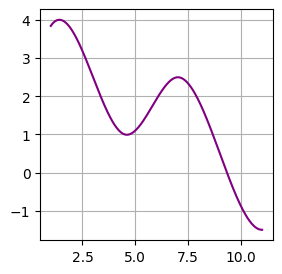

In [ ]:
from scipy.interpolate import CubicSpline
f = CubicSpline(x, y, bc_type = 'natural')
x_new = np.linspace(1,11,300)
y_extra = f(x_new)
plt.figure(figsize=[3,3])
plt.plot(x_new, y_extra, 'purple',)
plt.grid()

#Regresion lineal

Pendiente: 0.8392857142857143
Intersección con el eje y: 0.07142857142857117


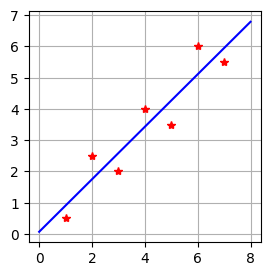

In [ ]:
import numpy as np

# Datos de los puntos
x = np.array([1, 2, 3, 4, 5, 6, 7])
y = np.array([0.5, 2.5, 2, 4, 3.5, 6, 5.5])

# Definición de la función de error
def error(a0, a1):
    return sum((y - a0 - a1 * x) ** 2)

# Cálculo de las derivadas parciales de la función de error
def a1(x, y, n):
    return (n*sum(x*y)-sum(x)*sum(y))/(n*sum(x**2)-(sum(x)**2))

def a0(x, y, a1, n):
    return (sum(y)/n) - a1*(sum(x)/n)

def fun(a1, a0, x1):
  return a1*x1+a0

# Resolución del sistema de ecuaciones lineales
va1 = a1(x,y,len(x))
va0 = a0(x,y,va1, len(x))
err = error(va0, va1)
# Impresión de los resultados
print("Pendiente:", va1)
print("Intersección con el eje y:", va0)
x1 = np.linspace(0,8,100)
plt.figure(figsize=[3,3])
plt.plot(x,y,'r*', x1, fun(va1,va0,x1), 'b')
plt.grid()

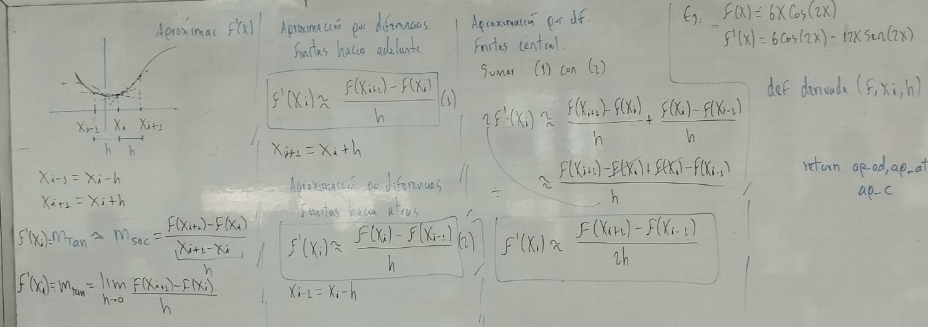

In [ ]:
def derivada(func, Xi, h):
  ap_at = (func(Xi) - func(Xi-h)) / h
  ap_ad = (func(Xi+h) - func(Xi)) / h
  ap_c = (func(Xi+h) - func(Xi-h)) / (2*h)
  return  ap_at, ap_ad, ap_c

def func_ej(x):
  return 6*x*np.cos(2*x)

def func_real(x):
  return 6*np.cos(2*x) - 12*x*np.sin(2*x)

def error(real, aprox):
  return np.abs(real-aprox)/np.abs(real)*100

h = 0.001
xi = 3
[ap_at, ap_ad, ap_c] = derivada(func_ej, xi, h)
real = func_real(xi)
print(error(real, [ap_at, ap_ad, ap_c]))

[1.97186771e-01 1.97417214e-01 1.15221470e-04]


In [ ]:
def func2_real(x):
  return -24*np.sin(2*x) - 24*x*np.cos(2*x)

def derivada2(func, Xi, h):
  return (func(Xi+h) - (2*func(Xi)) + func(Xi-h)) / (h*h)

print(error(func2_real(xi), derivada2(func_ej, xi, h)))

2.9752335958529506e-05


In [ ]:
def func(x):
  return 2*(x**4) - 6*(x**3) - 12*x - 8

[x0, x1,  x2] = -0.5, 1, 2